In [1]:
from sklearn.metrics import roc_curve
import numpy as np



In [2]:
y_pred_transfer_learning = np.load("y_pred_transfer_learning_no_data_aug.npy")
y_test_transfer_learning = np.load("y_test_transfer_learning_no_data_aug.npy")
y_pred_cnn_data_aug = np.load("y_pred_cnn_data_aug.npy")
y_test_cnn_data_aug = np.load("y_test_cnn_data_aug.npy")
y_pred_cnn_no_data_aug = np.load("y_pred_cnn_no_data_aug.npy")
y_test_cnn_no_data_aug = np.load("y_test_cnn_no_data_aug.npy")

In [3]:
fpr_transfer, tpr_transfer, thresholds_transfer = roc_curve(y_test_transfer_learning, y_pred_transfer_learning)
fpr_cnn_no, tpr_cnn_no, thresholds_cnn_no = roc_curve(y_test_cnn_no_data_aug, y_pred_cnn_no_data_aug)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test_cnn_data_aug, y_pred_cnn_data_aug)

In [4]:
from sklearn.metrics import auc
auc_transfer = auc(fpr_transfer, tpr_transfer)
auc_cnn_no = auc(fpr_cnn_no, tpr_cnn_no)
auc_cnn = auc(fpr_cnn, tpr_cnn)

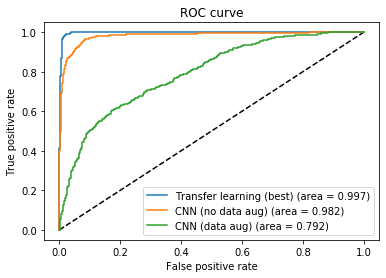

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_transfer, tpr_transfer, label='Transfer learning (best) (area = {:.3f})'.format(auc_transfer))
plt.plot(fpr_cnn_no, tpr_cnn_no, label='CNN (no data aug) (area = {:.3f})'.format(auc_cnn_no))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (data aug) (area = {:.3f})'.format(auc_cnn))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()